In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.core.display import HTML
import re


In [66]:
df = pd.read_csv("imgs/aa_tt_04_img_bppf_j48_vv_preds.csv").fillna(0)
pd.pivot_table(df, values='filename', index=['actual'], columns=['predicted'], aggfunc=len)

predicted,1:FIRE,2:NOFIRE
actual,,
1:FIRE,12,4
2:NOFIRE,20,68


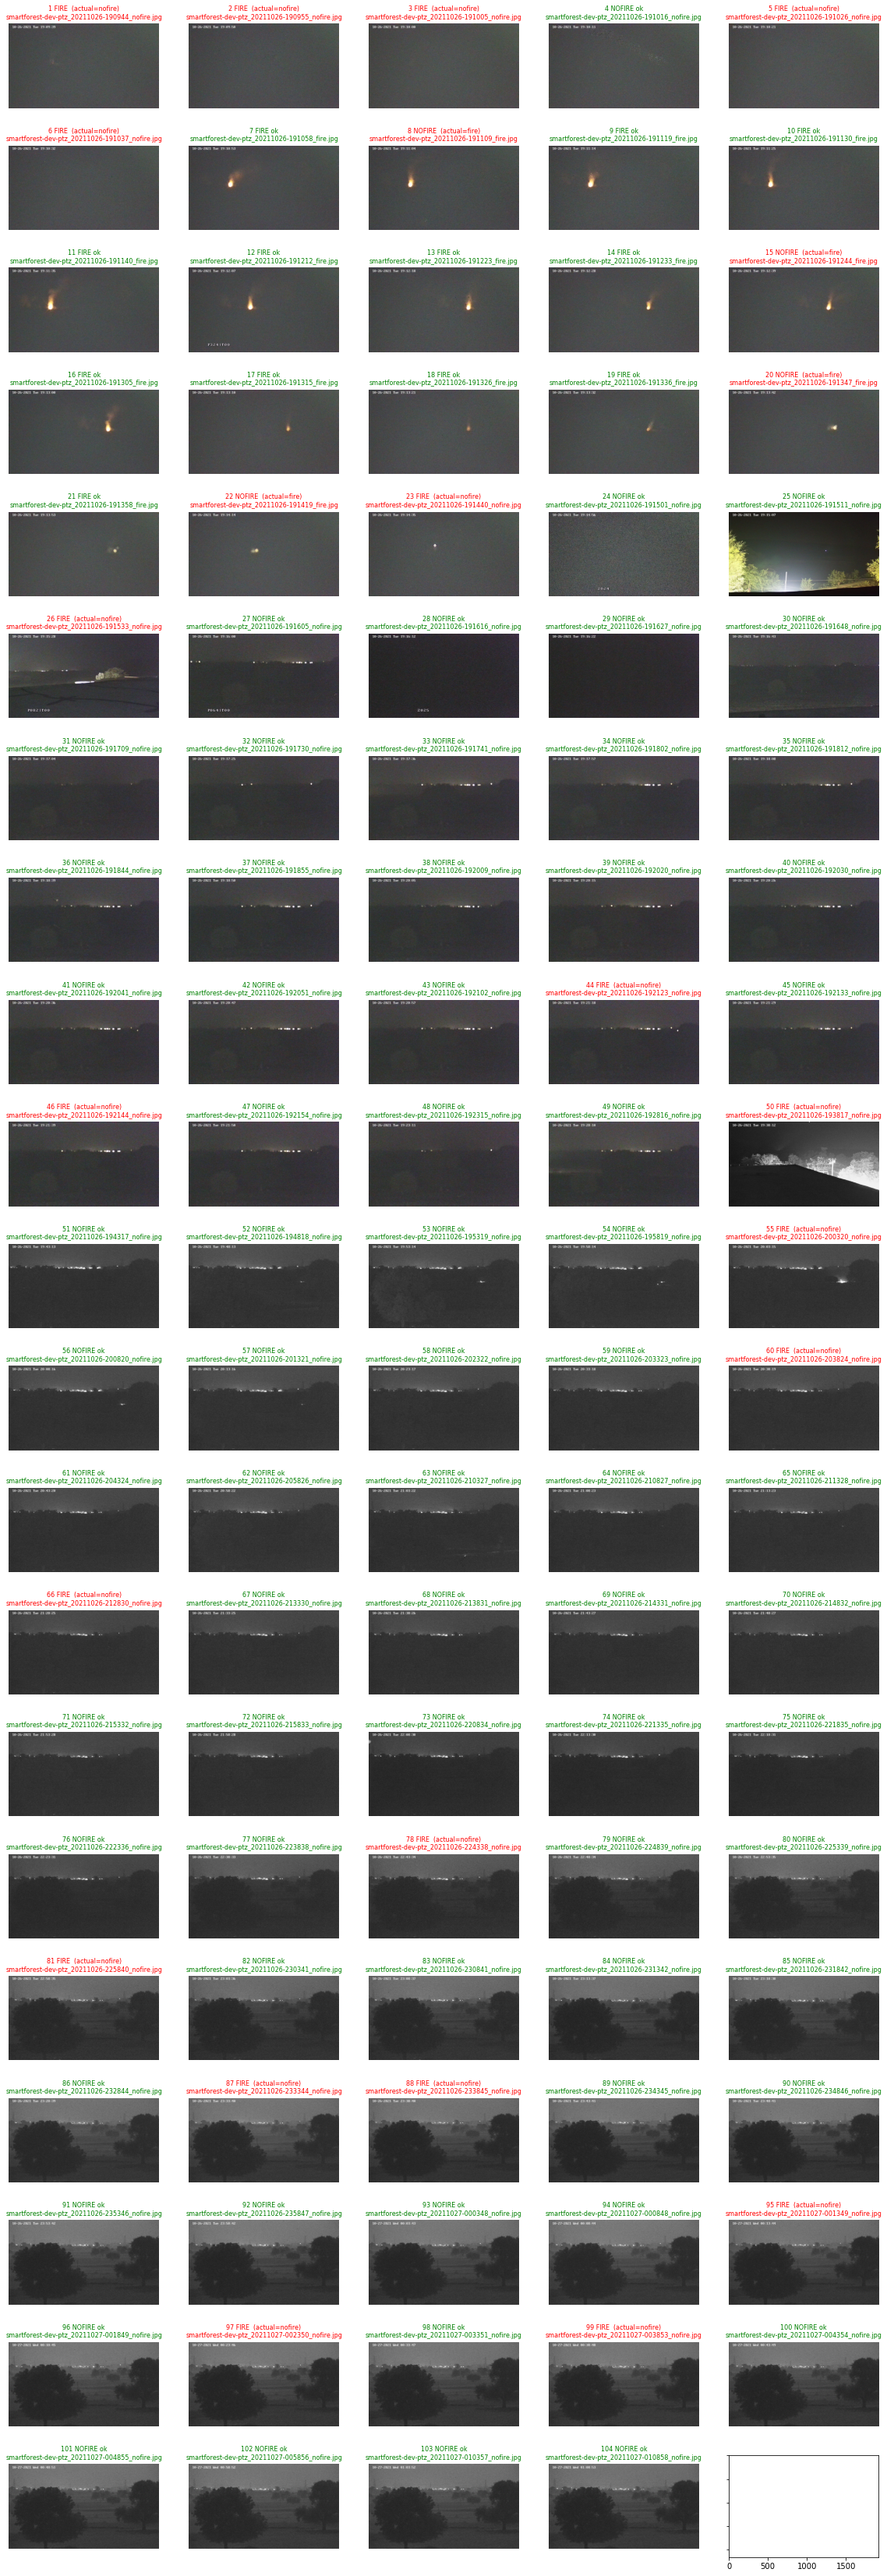

In [68]:
# ['id', 'filename', 'inst#', 'actual', 'predicted', 'error', 'prediction', 'pics']
fig, axes = plt.subplots(nrows=21, ncols=5, figsize=(20, 60), sharex=True, sharey=True)
axes = axes.flatten()
for i in range(df.shape[0]):
    elem = df.iloc[i]
    actual = elem['actual'] ; actual = re.sub('^\d+:', '', actual)
    predicted = elem['predicted'] ; predicted = re.sub('^\d+:', '', predicted)
    error = elem['error'] == '+'
    filename = elem['filename']

    axes[i].imshow(plt.imread(f"imgs/{df.filename[i]}"))
    if ( error) :
        axes[i].set_title(f"{i+1} {predicted}  (actual={actual.lower()})\n{filename}", 
                            fontsize=8, color='red' if error else 'black')
    else:
        axes[i].set_title(f"{i+1} {predicted} ok\n{filename}", 
                            fontsize=8, color='green')
    axes[i].axis('off')